### Imports

In [ ]:
# !pip3 install ipywidgets
# !pip3 install matplotlib

In [20]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rnd
import math
import time
from sklearn.linear_model import LinearRegression
import numpy as np

# Machine Learning

### Bronnen

**Fast.ai**

+ [Practical Deep Learning for Coders](https://course.fast.ai/)
+ [Neural net foundations](https://course.fast.ai/Lessons/lesson3.html)

**CodingTrain**:

+ [Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
+ [Mathematics of Gradient Descent](https://www.youtube.com/watch?v=jc2IthslyzM)

### Huisprijs model

+ **prijs (y)** wordt bepaald door **prijs per vierkante meter (w)** en **vaste grondprijs (b)**
+ y = w*x + b

### Data

In [2]:
m2 = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]

In [3]:
prices = [384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063]

### Handmatig matchen
Uitdaging: wie matcht het best?

In [4]:
#------------------------------------------

def manualFit(w, b):
    
    fit = [w * x + b for x in m2]
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')
    
    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')
    
    plt.show()

#------------------------------------------

interact(manualFit, w=(-2,2,0.01), b=(-1000,1000))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0, step=0.01), IntSlider(value=0…

<function __main__.manualFit(w, b)>

### Met indicator

In [109]:
# TODO: implement

#------------------------------------------

def mse(fit):

# meansquare error = sum(y-y_pred)^2/n
# fit = yhat

# mse = sum([(prices-fit)^2 for x in fit])/len(fit)

    sse = 0

    for i in range(len(m2)):
       sse += (prices[i]-fit[i])**2


    return(math.sqrt(sse/len(m2)))

#------------------------------------------

def manualFit(w, b):
    
    fit = [w * x + b for x in m2]
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')
    
    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')
    
    plt.show()
    
    # Our indicator
    print(mse(fit))

#------------------------------------------

interact(manualFit, w=(-2,2,0.01), b=(-1000,1000))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0, step=0.01), IntSlider(value=0…

<function __main__.manualFit(w, b)>

In [28]:
X= np.array(m2).reshape((-1, 1))
y = np.array(prices)

reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[0.70750745]
321.3023736341138


### Gradient descent

epoch:  0
mse:  353.6296512247711
epoch:  1
mse:  229.90219790495584
epoch:  2
mse:  192.5159222564441
epoch:  3
mse:  180.8601713750129
epoch:  4
mse:  176.93408464950687
epoch:  5
mse:  175.5410784475509
epoch:  6
mse:  175.03408850801134
epoch:  7
mse:  174.84686538635034
epoch:  8
mse:  174.77652831807038
epoch:  9
mse:  174.74912607881566
epoch:  10
mse:  174.73752351706668
epoch:  11
mse:  174.73173905216655
epoch:  12
mse:  174.72809760372132
epoch:  13
mse:  174.7252455970148
epoch:  14
mse:  174.72268443219764
epoch:  15
mse:  174.7202304376131
epoch:  16
mse:  174.71781595208478
epoch:  17
mse:  174.71541605035364
epoch:  18
mse:  174.71302155034454
epoch:  19
mse:  174.71062906952199
epoch:  20
mse:  174.70823736181066
epoch:  21
mse:  174.70584596817534
epoch:  22
mse:  174.70345471951356
epoch:  23
mse:  174.70106355353025
epoch:  24
mse:  174.6986724472765


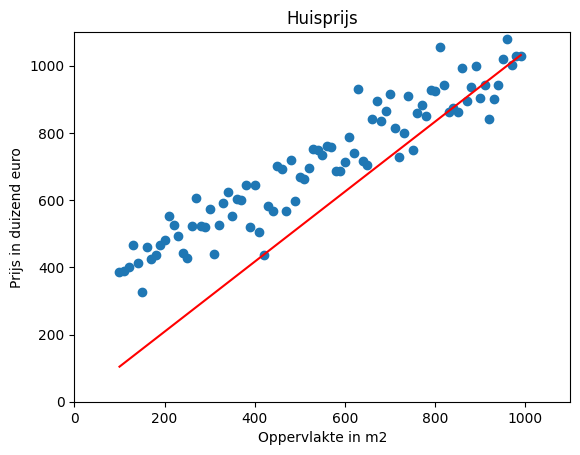

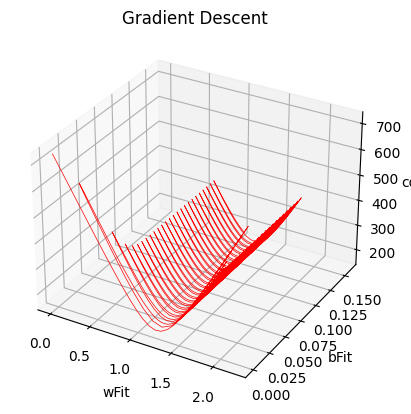

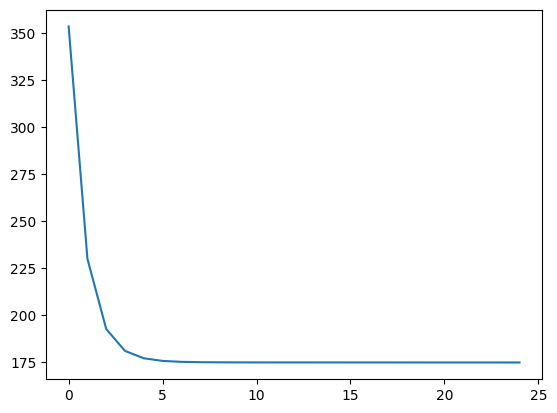

In [108]:
# TODO: implement

#------------------------------------------

# Learning iterations
epochs = 25

# Learning rate
learningRate = 1e-6

# Epochs counter
epoch = 0
q=[]

#------------------------------------------

# Initial values ("guess")
wFit = 0.0
bFit = 0.0

costs = []
wFits = []
bFits = []

#------------------------------------------

def cost(w, b):
    
    #for the cost function we choose MSE
    sse = 0

    for i in range(len(m2)):
       
       yhat = w * m2[i]+b

       sse += (prices[i]-yhat)**2


    return(math.sqrt(sse/len(m2)))

#------------------------------------------

def gradientDescent(w, b):
    
    #derivative -> 0 

    deltaw = 0
    deltab = 0

    for i in range(len(m2)):
        yhat = w * m2[i]+b

        err = (prices[i]-yhat)

        #gradientsteps
        # fill in the derivatives for w,b of MSE 
        deltaw -= (2 * err * m2[i])/len(m2)
        deltab -= (2 * err)/len(m2)

            
        # apply learningrate 
        w -= learningRate * deltaw
        b -= learningRate * deltab

        # Keep track for gradient descent plot
        costs.append(cost(w, b))
        wFits.append(w)
        bFits.append(b)
    
        
    
    return (w, b)

#------------------------------------------

def plotFit():
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')

    fit = [wFit * x + bFit for x in m2]

    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')

    plt.show()

#------------------------------------------

while epoch < epochs: #epoch=stapje
    
    print("epoch: ", epoch)
    
    wFit, bFit = gradientDescent(wFit, bFit)
    mse = cost(wFit, bFit)
    
    print("mse: ", mse)
 
    q.append(mse)
    epoch += 1
    


#------------------------------------------
def plotDescent():
    
    ax = plt.figure().add_subplot(projection='3d')

    ax.set(xlabel='wFit', ylabel='bFit', zlabel='cost', title='Gradient Descent')

    # https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html
    # ax.view_init(elev=90, azim=-90, roll=0)

    plt.plot(wFits, bFits, costs, 'red', linewidth=0.5)

    plt.show()

#------------------------------------------

plotFit()
plotDescent()

x =  list(range(0,epoch))
plt.plot(range(0,epoch),q)
plt.show()


#------------------------------------------

### Exploreren

- Wat gebeurt er als je het aantal epochs klein kiest?
> MSE 30k, slechter performance
- Wat gebeurt er als je de learn rate te klein kiest?
>1e-10 -> MSE 24k improvement
- Wat gebeurt er als je de learn rate te groot kiest?